# Twitter dataset analysis with Infomap

## Run pipelines

In [1]:
# IMPORTS
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from pipelines import Orchestrator
from analysis_helper import AnalysisHelper

INFO - datasources.tw.tw - load config file
INFO - datasources.tw.proxy_provider - getting proxy list
INFO - datasources.tw.proxy_provider - reading proxy list json file
DEBUG - datasources.tw.tw_api - INIT Tw api
DEBUG - datasources.tw.tw_premium_api - INIT Tw premium api
INFO - datasources.tw.tw - INIT Tw
DEBUG - matplotlib.pyplot - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
# LOGGING LEVEL
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [3]:
# CONFIGS
project_name = 'uk_healthcare'

cd_config = ('infomap', {})

In [4]:
# PIPELINE
o = Orchestrator(project_name, cd_config)
results = o.execute()

## Analysis

### Event and graph analysis

#### Events summary

In [5]:
display(AnalysisHelper.get_single_summary('event_detection', 'event', results)
        [['start_date', 'end_date', 'location', 'hashtags']])

,start_date,end_date,location,hashtags
name,,,,
16-days-of-action-2018,2018-11-25,2018-12-10,United Kingdom,"[#16days, #16daysofaction, #16daysofactiontool..."
elf-day,2018-12-03,2018-12-12,United Kingdom,"[#elfday, #elfday2018]"
dry-january-2018,2018-01-01,2018-01-31,United Kingdom,[#dryjanuary]
cervical-cancer-prevention-week-2018,2018-01-21,2018-01-27,United Kingdom,[#cervicalcancer]
time-to-talk-day-2018,2018-02-06,2018-02-07,United Kingdom,[#timetotalk]
eating-disorder-awareness-week-2018,2018-02-25,2018-03-03,United Kingdom,"[#edaw18, #edaw2018, #eatingdisordersawareness..."
rare-disease-day-2018,2018-02-28,2018-03-01,United Kingdom,[#rarediseaseday]
ovarian-cancer-awareness-month-2018,2018-03-01,2018-03-31,United Kingdom,"[#ovariancancer, #ovariancancerawareness, #ova..."
nutrition-and-hydration-week-2018,2018-03-11,2018-03-17,United Kingdom,"[#nutritionandhydrationweek, #NHW2018]"


#### Event's graphs

In [6]:
graph_summaries = AnalysisHelper.get_single_summary('network_creation', 'graph_summary', results)
graph_summaries['scc_over_nodes'] = graph_summaries.apply(lambda x: x['strongly_conn_components']/x['no_nodes'], axis=1)
display(graph_summaries.describe().round(decimals=3))
display(graph_summaries.round(decimals=3))

,assortativity,avg_clustering,avg_degree,avg_weighted_degree,density,no_edges,no_nodes,strongly_conn_components,scc_over_nodes
count,25.000,25.000,25.000,25.000,25.000,25.000,25.000,25.000,25.000
mean,-0.221,0.049,2.040,2.215,0.004,253.000,254.160,250.280,0.983
std,0.137,0.041,0.458,0.620,0.002,60.266,59.012,59.787,0.020
min,-0.561,0.000,1.401,1.433,0.002,177.000,141.000,130.000,0.922
25%,-0.283,0.020,1.763,1.909,0.003,209.000,215.000,212.000,0.978
50%,-0.195,0.039,1.911,1.984,0.004,235.000,256.000,253.000,0.988
75%,-0.137,0.070,2.227,2.499,0.005,281.000,293.000,289.000,0.997
max,0.005,0.167,3.319,4.142,0.012,436.000,396.000,394.000,1.000


,assortativity,avg_clustering,avg_degree,avg_weighted_degree,connected,density,no_edges,no_nodes,strongly_conn_components,scc_over_nodes
name,,,,,,,,,,
16-days-of-action-2018,-0.132,0.010,1.763,1.909,False,0.002,349,396,394,0.995
elf-day,-0.182,0.100,2.389,2.499,False,0.003,436,365,357,0.978
dry-january-2018,-0.283,0.028,1.992,2.017,False,0.004,234,235,231,0.983
cervical-cancer-prevention-week-2018,-0.091,0.061,1.837,1.952,False,0.004,192,209,204,0.976
time-to-talk-day-2018,-0.249,0.039,1.724,1.925,False,0.003,231,268,265,0.989
eating-disorder-awareness-week-2018,-0.154,0.030,1.883,1.984,False,0.004,241,256,253,0.988
rare-disease-day-2018,-0.244,0.000,1.401,1.469,False,0.002,206,294,294,1.000
ovarian-cancer-awareness-month-2018,-0.371,0.050,1.879,1.963,False,0.004,202,215,212,0.986
nutrition-and-hydration-week-2018,-0.284,0.056,2.388,2.755,False,0.004,326,273,269,0.985


* *# nodes*: number of users.
* *# edges*: number of relations between users.
* *avg degree*: average number of edges per node.
* *avg degree*: average weigth sum per node.
* *density*: expresses the how sparse is the adjacency matrix (i.e. how likely that a node has edges). 0 for a graph without edges and 1 for a complete graph.

\begin{align}
&\begin{aligned}
d = \frac{m}{n(n-1)}
\end{aligned}\\
&\begin{aligned}
m = \text{# edges}
\end{aligned}\\
&\begin{aligned}
n = \text{# nodes}
\end{aligned}
\end{align}

* *connected*: for each pairs of nodes exists a path that connects them.
* *strongly connected components*: group of nodes for which for each pair of nodes exists a path that connects them. Can be broadly relatable to the concept of community.
* *avg clustering*: average for each node of the fraction of possible triangles through that node that exist.
* *assortativity*: measures how much nodes are likely to connect to nodes with the same degree (>0) or with a different degree (<0).

### Community Detection analysis

#### Partitions summary

In [7]:
partitions_summary = AnalysisHelper.get_multi_summary('community_detection', 'partition_summary', results)

for ds_name, ds in partitions_summary.items():
    print(f'event "{ds_name}":')
    display(ds.round(decimals=2))
    display(ds.describe().round(decimals=2))

event "16-days-of-action-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
2,14,16,2.29,2.29,0.09,True,14,0.00,-0.55
3,12,23,3.83,4.83,0.17,True,12,0.00,-0.12
5,4,3,1.50,1.50,0.25,True,4,0.00,NaN
6,25,37,2.96,3.20,0.06,True,25,0.00,-0.44
10,15,14,1.87,1.87,0.07,True,15,0.00,NaN
13,4,4,2.00,3.50,0.33,True,4,0.00,NaN
16,4,3,1.50,1.50,0.25,True,4,0.00,NaN
17,15,14,1.87,1.87,0.07,True,15,0.00,-0.28
19,5,5,2.00,2.00,0.25,True,5,0.00,1.00


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,30.00,30.00,30.00,30.00,30.00,30.00,30.00,9.00
mean,7.20,7.67,1.98,2.24,0.21,7.17,0.01,-0.23
std,4.80,7.21,0.53,0.73,0.10,4.79,0.08,0.54
min,4.00,3.00,1.50,1.50,0.06,4.00,0.00,-1.00
25%,4.00,4.00,1.60,1.76,0.14,4.00,0.00,-0.44
50%,5.00,5.00,1.87,2.00,0.20,5.00,0.00,-0.28
75%,7.75,7.75,2.00,2.48,0.25,7.75,0.00,-0.15
max,25.00,37.00,3.83,4.83,0.50,25.00,0.42,1.00


event "elf-day":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
1,17,24,2.82,2.94,0.09,True,15,0.12,-0.73
2,27,74,5.48,5.48,0.11,True,27,0.30,-0.12
3,30,38,2.53,2.80,0.04,True,27,0.22,-0.76
4,4,3,1.50,1.50,0.25,True,4,0.00,NaN
5,5,4,1.60,1.60,0.20,True,5,0.00,-0.58
6,5,4,1.60,1.60,0.20,True,5,0.00,NaN
7,5,4,1.60,3.20,0.20,True,5,0.00,-0.58
8,10,12,2.40,2.40,0.13,True,9,0.24,-0.41
9,5,4,1.60,1.60,0.20,True,5,0.00,-0.58


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,29.00,29.00,29.00,29.00,29.00,29.00,29.00,14.00
mean,7.86,9.97,2.08,2.15,0.22,7.62,0.08,-0.51
std,7.35,14.81,0.97,1.00,0.09,6.96,0.14,0.18
min,4.00,3.00,1.50,1.50,0.04,4.00,0.00,-0.76
25%,4.00,3.00,1.50,1.50,0.17,4.00,0.00,-0.58
50%,5.00,4.00,1.60,1.67,0.25,5.00,0.00,-0.58
75%,7.00,9.00,2.25,2.40,0.25,7.00,0.12,-0.43
max,30.00,74.00,5.48,5.48,0.47,27.00,0.53,-0.12


event "dry-january-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,5,4,1.60,1.60,0.20,True,5,0.00,NaN
3,9,8,1.78,1.78,0.11,True,9,0.00,-0.60
5,27,26,1.93,1.93,0.04,True,27,0.00,NaN
7,18,17,1.89,2.11,0.06,True,18,0.00,NaN
13,9,11,2.44,2.44,0.15,True,8,0.17,-0.68
16,5,4,1.60,2.00,0.20,True,5,0.00,NaN
18,5,4,1.60,1.60,0.20,True,5,0.00,NaN
19,8,13,3.25,3.25,0.23,True,8,0.41,-0.27
21,6,5,1.67,1.67,0.17,True,6,0.00,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,17.00,17.00,17.00,17.00,17.00,17.00,17.00,4.00
mean,7.65,7.35,1.86,1.89,0.20,7.59,0.06,-0.51
std,6.16,6.34,0.54,0.54,0.10,6.15,0.14,0.18
min,4.00,3.00,1.50,1.50,0.04,4.00,0.00,-0.68
25%,4.00,3.00,1.50,1.50,0.15,4.00,0.00,-0.62
50%,5.00,4.00,1.60,1.67,0.20,5.00,0.00,-0.55
75%,9.00,9.00,1.89,2.00,0.25,8.00,0.00,-0.44
max,27.00,26.00,3.25,3.25,0.50,27.00,0.42,-0.27


event "cervical-cancer-prevention-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,10,12,2.40,3.20,0.13,True,10,0.18,-0.25
1,9,11,2.44,2.44,0.15,True,9,0.20,-0.56
4,4,3,1.50,1.50,0.25,True,4,0.00,NaN
5,4,7,3.50,3.50,0.58,True,3,0.70,-0.35
6,11,10,1.82,2.00,0.09,True,11,0.00,NaN
7,9,8,1.78,1.78,0.11,True,9,0.00,NaN
8,4,3,1.50,1.50,0.25,True,4,0.00,NaN
10,4,9,4.50,4.50,0.75,True,2,0.68,NaN
13,4,3,1.50,2.00,0.25,True,4,0.00,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,19.00,19.00,19.00,19.00,19.00,19.00,19.00,4.00
mean,5.74,5.95,2.05,2.18,0.26,5.53,0.11,-0.40
std,2.45,3.27,0.80,0.89,0.16,2.57,0.22,0.13
min,4.00,3.00,1.50,1.50,0.09,2.00,0.00,-0.56
25%,4.00,3.00,1.50,1.50,0.17,4.00,0.00,-0.47
50%,4.00,4.00,1.78,2.00,0.25,4.00,0.00,-0.40
75%,7.50,8.50,2.20,2.22,0.25,7.00,0.09,-0.33
max,11.00,12.00,4.50,4.50,0.75,11.00,0.70,-0.25


event "time-to-talk-day-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,4,3,1.50,1.50,0.25,True,4,0.00,NaN
1,8,7,1.75,1.75,0.12,True,8,0.00,NaN
2,26,25,1.92,1.92,0.04,True,26,0.00,NaN
5,7,10,2.86,2.86,0.24,True,7,0.00,NaN
7,19,18,1.89,2.32,0.05,True,19,0.00,NaN
11,4,3,1.50,1.50,0.25,True,4,0.00,NaN
14,7,6,1.71,1.71,0.14,True,7,0.00,NaN
18,8,7,1.75,1.75,0.12,True,8,0.00,-1.00
20,4,4,2.00,2.50,0.33,True,4,0.29,0.00


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,17.00,17.00,17.00,17.00,17.00,17.00,17.00,5.00
mean,8.29,8.88,2.10,2.26,0.23,8.12,0.10,-0.44
std,7.11,8.43,0.82,0.98,0.15,7.06,0.21,0.37
min,4.00,3.00,1.50,1.50,0.04,3.00,0.00,-1.00
25%,4.00,4.00,1.60,1.60,0.12,4.00,0.00,-0.56
50%,5.00,6.00,1.75,1.75,0.24,5.00,0.00,-0.35
75%,8.00,10.00,2.00,2.50,0.25,8.00,0.00,-0.29
max,26.00,32.00,4.40,4.43,0.58,26.00,0.70,0.00


event "eating-disorder-awareness-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
2,12,11,1.83,2.00,0.08,True,12,0.00,NaN
3,9,9,2.00,2.00,0.12,True,9,0.00,-0.60
4,5,12,4.80,4.80,0.60,True,3,0.59,-0.39
6,6,9,3.00,3.00,0.30,True,6,0.00,NaN
10,14,13,1.86,2.00,0.07,True,14,0.00,-0.68
12,9,8,1.78,1.78,0.11,True,9,0.00,NaN
16,4,3,1.50,2.00,0.25,True,4,0.00,NaN
17,5,5,2.00,2.00,0.25,True,5,0.00,-0.41
22,5,4,1.60,1.60,0.20,True,5,0.00,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,22.00,22.00,22.00,22.00,22.00,22.00,22.00,9.00
mean,6.68,7.09,2.09,2.21,0.21,6.55,0.05,-0.54
std,2.80,4.20,0.91,0.93,0.11,2.87,0.16,0.13
min,4.00,3.00,1.50,1.50,0.07,3.00,0.00,-0.73
25%,5.00,4.00,1.60,1.60,0.13,5.00,0.00,-0.67
50%,5.50,5.50,1.73,1.89,0.20,5.50,0.00,-0.50
75%,8.00,9.00,2.00,2.30,0.25,7.75,0.00,-0.41
max,14.00,18.00,4.80,4.80,0.60,14.00,0.59,-0.39


event "rare-disease-day-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
4,5,4,1.60,1.60,0.20,True,5,0.0,NaN
5,9,14,3.11,3.56,0.19,True,9,0.0,NaN
7,11,10,1.82,1.82,0.09,True,11,0.0,NaN
10,18,17,1.89,1.89,0.06,True,18,0.0,NaN
15,4,3,1.50,1.50,0.25,True,4,0.0,NaN
16,6,5,1.67,1.67,0.17,True,6,0.0,NaN
23,6,5,1.67,1.67,0.17,True,6,0.0,NaN
31,4,4,2.00,2.00,0.33,True,4,0.0,NaN
49,5,6,2.40,2.40,0.30,True,5,0.0,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,13.00,13.00,13.00,13.00,13.00,13.00,13.0,0.0
mean,6.62,6.31,1.83,1.93,0.20,6.62,0.0,NaN
std,4.01,4.52,0.46,0.58,0.08,4.01,0.0,NaN
min,4.00,3.00,1.50,1.50,0.06,4.00,0.0,NaN
25%,4.00,4.00,1.60,1.60,0.17,4.00,0.0,NaN
50%,5.00,4.00,1.67,1.67,0.20,5.00,0.0,NaN
75%,6.00,6.00,1.89,2.00,0.25,6.00,0.0,NaN
max,18.00,17.00,3.11,3.56,0.33,18.00,0.0,NaN


event "ovarian-cancer-awareness-month-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,26,25,1.92,1.92,0.04,True,26,0.00,NaN
1,18,17,1.89,1.89,0.06,True,18,0.00,NaN
2,13,12,1.85,1.85,0.08,True,13,0.00,NaN
4,4,3,1.50,1.50,0.25,True,4,0.00,NaN
6,13,12,1.85,2.31,0.08,True,13,0.00,-0.67
7,6,5,1.67,1.67,0.17,True,6,0.00,NaN
8,6,5,1.67,1.67,0.17,True,6,0.00,-0.17
9,11,14,2.55,3.09,0.13,True,11,0.00,-0.26
10,4,3,1.50,1.50,0.25,True,4,0.00,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,18.00,18.00,18.00,18.00,18.00,18.00,18.00,4.00
mean,8.28,7.89,1.81,1.87,0.18,8.22,0.05,-0.31
std,6.04,6.30,0.45,0.52,0.09,6.04,0.14,0.25
min,4.00,3.00,1.50,1.50,0.04,4.00,0.00,-0.67
25%,4.00,3.00,1.50,1.50,0.12,4.00,0.00,-0.36
50%,6.00,5.00,1.69,1.69,0.20,6.00,0.00,-0.21
75%,10.50,12.00,1.88,1.91,0.25,10.50,0.00,-0.16
max,26.00,25.00,3.25,3.25,0.33,26.00,0.55,-0.14


event "nutrition-and-hydration-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
2,18,40,4.44,5.67,0.13,True,16,0.38,-0.40
3,9,8,1.78,1.78,0.11,True,9,0.00,-0.33
6,8,23,5.75,5.75,0.41,True,7,0.36,-0.28
7,4,3,1.50,1.50,0.25,True,4,0.00,NaN
14,67,66,1.97,2.15,0.01,True,67,0.00,NaN
16,7,6,1.71,1.71,0.14,True,7,0.00,-0.63
19,4,3,1.50,1.50,0.25,True,4,0.00,NaN
20,6,5,1.67,1.67,0.17,True,6,0.00,-0.17
21,5,4,1.60,1.60,0.20,True,5,0.00,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,20.00,20.00,20.00,20.00,20.00,20.00,20.00,8.00
mean,9.00,10.10,2.02,2.09,0.22,8.85,0.04,-0.42
std,14.06,15.91,1.09,1.26,0.09,14.01,0.11,0.16
min,4.00,3.00,1.50,1.50,0.01,4.00,0.00,-0.63
25%,4.00,3.00,1.50,1.50,0.16,4.00,0.00,-0.52
50%,4.50,4.00,1.63,1.63,0.25,4.50,0.00,-0.41
75%,7.25,6.50,1.98,2.00,0.25,7.00,0.00,-0.32
max,67.00,66.00,5.75,5.75,0.41,67.00,0.38,-0.17


event "brain-awareness-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,5,4,1.60,1.60,0.20,True,5,0.00,NaN
1,7,12,3.43,3.43,0.29,True,7,0.00,NaN
2,5,4,1.60,2.00,0.20,True,5,0.00,NaN
5,5,5,2.00,2.00,0.25,True,5,0.22,-0.17
7,5,6,2.40,2.40,0.30,True,5,0.00,NaN
10,8,11,2.75,2.75,0.20,True,8,0.00,1.00
14,6,6,2.00,2.00,0.20,True,6,0.00,-0.50
15,4,5,2.50,2.50,0.42,True,4,0.42,-0.41
16,8,7,1.75,1.75,0.12,True,8,0.00,0.07


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,25.00,25.00,25.00,25.00,25.00,25.00,25.00,14.00
mean,6.44,7.04,2.09,2.25,0.22,6.40,0.05,-0.32
std,2.69,4.45,0.60,0.66,0.08,2.71,0.11,0.44
min,4.00,3.00,1.50,1.50,0.10,4.00,0.00,-0.78
25%,5.00,4.00,1.60,1.75,0.17,5.00,0.00,-0.59
50%,6.00,5.00,2.00,2.00,0.20,5.00,0.00,-0.42
75%,7.00,9.00,2.40,2.60,0.25,7.00,0.00,-0.23
max,15.00,22.00,3.67,3.67,0.42,15.00,0.42,1.00


event "no-smoking-day-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
2,9,8,1.78,1.78,0.11,True,9,0.00,NaN
5,5,4,1.60,1.60,0.20,True,5,0.00,NaN
8,5,8,3.20,3.20,0.40,True,5,0.33,-0.33
12,6,5,1.67,1.67,0.17,True,6,0.00,NaN
14,13,18,2.77,4.15,0.12,True,11,0.00,-0.81
15,8,7,1.75,1.75,0.12,True,8,0.00,NaN
17,5,6,2.40,2.40,0.30,True,5,0.30,-0.50
19,9,12,2.67,2.67,0.17,True,9,0.00,-0.25
20,4,3,1.50,1.50,0.25,True,4,0.00,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,23.00,23.00,23.00,23.00,23.00,23.00,23.00,6.00
mean,5.91,6.13,2.02,2.14,0.24,5.70,0.07,-0.56
std,2.39,3.55,0.62,0.77,0.12,2.24,0.16,0.29
min,4.00,3.00,1.50,1.50,0.11,2.00,0.00,-1.00
25%,4.00,3.00,1.50,1.55,0.17,4.00,0.00,-0.73
50%,5.00,6.00,1.75,1.78,0.25,5.00,0.00,-0.50
75%,7.50,7.50,2.40,2.53,0.25,7.00,0.00,-0.37
max,13.00,18.00,3.50,4.15,0.58,11.00,0.56,-0.25


event "epilepsy-awareness-purple-day-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,6,5,1.67,1.67,0.17,True,6,0.00,NaN
1,6,7,2.33,2.67,0.23,True,6,0.00,-0.470000
6,5,4,1.60,2.40,0.20,True,5,0.00,NaN
7,4,3,1.50,1.50,0.25,True,4,0.00,-0.500000
9,4,3,1.50,1.50,0.25,True,4,0.00,-0.500000
10,4,4,2.00,2.00,0.33,True,4,0.00,NaN
16,9,11,2.44,2.44,0.15,True,9,0.00,-0.460000
20,4,3,1.50,1.50,0.25,True,4,0.00,NaN
24,4,3,1.50,1.50,0.25,True,4,0.00,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,20.00,20.00,20.00,20.00,20.00,20.00,20.00,9.000000
mean,7.10,6.90,1.81,1.90,0.20,7.10,0.01,inf
std,4.80,6.02,0.34,0.44,0.07,4.80,0.04,NaN
min,4.00,3.00,1.50,1.50,0.06,4.00,0.00,-0.610000
25%,4.00,3.00,1.50,1.50,0.15,4.00,0.00,-0.500000
50%,5.00,4.50,1.67,1.75,0.22,5.00,0.00,-0.470000
75%,8.25,8.25,2.00,2.10,0.25,8.25,0.00,-0.330000
max,21.00,27.00,2.57,2.76,0.33,21.00,0.13,inf


event "experience-of-care-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
3,7,6,1.71,1.71,0.14,True,7,0.00,NaN
4,5,6,2.40,2.40,0.30,True,5,0.30,-0.50
8,9,9,2.00,2.00,0.12,True,8,0.00,-0.50
9,10,11,2.20,2.60,0.12,True,10,0.12,-0.56
10,9,12,2.67,2.67,0.17,True,9,0.25,-0.74
11,6,8,2.67,8.00,0.27,True,5,0.22,-0.15
13,4,4,2.00,2.00,0.33,True,4,0.00,NaN
14,8,20,5.00,5.00,0.36,True,7,0.53,-0.22
15,17,22,2.59,2.82,0.08,True,17,0.09,-0.35


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,18.00,18.00,18.00,18.00,18.00,18.00,18.00,9.00
mean,6.56,8.28,2.40,2.90,0.25,6.39,0.14,-0.42
std,3.26,5.81,0.98,1.66,0.10,3.22,0.18,0.18
min,4.00,3.00,1.50,1.50,0.08,4.00,0.00,-0.74
25%,4.25,4.00,1.63,1.79,0.18,4.25,0.00,-0.50
50%,5.00,6.00,2.30,2.45,0.25,5.00,0.04,-0.41
75%,7.75,10.50,2.65,2.82,0.32,7.00,0.26,-0.35
max,17.00,22.00,5.00,8.00,0.42,17.00,0.53,-0.15


event "brain-injury-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,18,37,4.11,4.67,0.12,True,15,0.62,-0.30
1,8,9,2.25,3.00,0.16,True,8,0.00,-0.63
2,4,4,2.00,5.00,0.33,True,4,0.00,NaN
3,13,18,2.77,3.08,0.12,True,13,0.16,-0.52
4,12,11,1.83,2.17,0.08,True,12,0.00,-1.00
5,7,8,2.29,2.29,0.19,True,6,0.00,-0.67
8,4,4,2.00,2.00,0.33,True,4,0.00,NaN
9,4,3,1.50,1.50,0.25,True,4,0.00,NaN
11,4,3,1.50,2.00,0.25,True,4,0.00,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,31.00,31.00,31.00,31.00,31.00,31.00,31.00,14.00
mean,6.06,7.19,2.15,2.48,0.25,5.74,0.08,-0.48
std,3.20,6.69,0.71,0.98,0.09,2.82,0.18,0.25
min,4.00,3.00,1.50,1.50,0.08,3.00,0.00,-1.00
25%,4.00,3.50,1.55,1.60,0.20,4.00,0.00,-0.61
50%,5.00,5.00,2.00,2.29,0.25,5.00,0.00,-0.45
75%,7.00,8.00,2.45,2.93,0.28,6.00,0.00,-0.35
max,18.00,37.00,4.11,5.00,0.58,15.00,0.70,0.07


event "mental-health-awareness-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,5,6,2.40,2.40,0.30,True,5,0.00,NaN
1,95,94,1.98,1.98,0.01,True,95,0.00,NaN
2,15,26,3.47,3.60,0.12,True,14,0.62,-0.37
3,4,4,2.00,2.00,0.33,True,4,0.00,NaN
4,4,3,1.50,1.50,0.25,True,4,0.00,NaN
8,4,4,2.00,2.00,0.33,True,4,0.00,NaN
9,4,3,1.50,1.50,0.25,True,4,0.00,NaN
18,4,4,2.00,2.00,0.33,True,4,0.00,NaN
19,4,3,1.50,2.00,0.25,True,4,0.00,-0.50


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,16.00,16.00,16.00,16.00,16.00,16.00,16.00,2.00
mean,10.69,10.75,1.82,1.90,0.24,10.62,0.04,-0.43
std,22.65,22.90,0.52,0.55,0.08,22.64,0.15,0.10
min,4.00,3.00,1.50,1.50,0.01,4.00,0.00,-0.50
25%,4.00,3.00,1.50,1.50,0.23,4.00,0.00,-0.47
50%,4.00,3.50,1.58,1.82,0.25,4.00,0.00,-0.43
75%,5.25,5.00,2.00,2.00,0.26,5.25,0.00,-0.40
max,95.00,94.00,3.47,3.60,0.33,95.00,0.62,-0.37


event "dementia-action-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
7,4,3,1.50,1.50,0.25,True,4,0.00,NaN
9,4,3,1.50,1.50,0.25,True,4,0.00,-0.50
11,4,3,1.50,2.50,0.25,True,4,0.00,NaN
12,7,11,3.14,3.14,0.26,True,6,0.51,0.61
13,4,4,2.00,2.00,0.33,True,4,0.00,NaN
15,5,4,1.60,1.60,0.20,True,5,0.00,-0.58
16,6,14,4.67,4.67,0.47,True,5,0.53,-0.26
19,5,4,1.60,2.00,0.20,True,5,0.00,NaN
22,4,3,1.50,1.50,0.25,True,4,0.00,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,26.00,26.00,26.00,26.00,26.00,26.00,26.00,8.00
mean,5.65,7.00,2.23,2.36,0.25,5.27,0.11,-0.36
std,1.94,6.08,1.02,1.03,0.07,1.43,0.21,0.45
min,4.00,3.00,1.50,1.50,0.12,4.00,0.00,-1.00
25%,4.00,4.00,1.60,1.60,0.20,4.00,0.00,-0.52
50%,5.00,4.00,1.66,2.00,0.25,5.00,0.00,-0.42
75%,6.75,8.50,2.40,2.77,0.26,5.75,0.00,-0.28
max,12.00,30.00,5.00,5.00,0.47,10.00,0.66,0.61


event "mnd-awareness-month-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,19,26,2.74,2.74,0.08,True,18,0.26,-0.47
1,6,9,3.00,4.00,0.30,True,6,0.32,-0.32
2,22,22,2.00,2.00,0.05,True,22,0.00,-1.00
3,4,3,1.50,1.50,0.25,True,4,0.00,NaN
4,7,6,1.71,1.71,0.14,True,7,0.00,NaN
5,7,19,5.43,5.43,0.45,True,5,0.77,-0.31
7,5,4,1.60,1.60,0.20,True,5,0.00,NaN
9,21,70,6.67,10.29,0.17,True,14,0.38,-0.72
10,4,4,2.00,2.00,0.33,True,4,0.00,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,14.00,14.00,14.00,14.00,14.00,14.00,14.00,6.00
mean,8.86,13.50,2.54,3.06,0.22,8.07,0.15,-0.51
std,6.60,17.93,1.58,2.43,0.11,5.80,0.23,0.29
min,4.00,3.00,1.50,1.50,0.05,4.00,0.00,-1.00
25%,4.25,4.00,1.63,1.63,0.14,4.00,0.00,-0.66
50%,6.50,6.00,1.89,2.00,0.23,5.50,0.00,-0.40
75%,8.50,16.50,2.65,3.68,0.29,8.50,0.30,-0.31
max,22.00,70.00,6.67,10.29,0.45,22.00,0.77,-0.25


event "wear-purple-for-jia-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,54,54,2.00,2.04,0.02,True,53,0.00,-0.390000
1,11,12,2.18,2.55,0.11,True,11,0.06,-0.610000
2,9,8,1.78,1.78,0.11,True,9,0.00,NaN
3,6,5,1.67,1.67,0.17,True,6,0.00,-inf
4,14,31,4.43,5.29,0.17,True,8,0.16,-0.520000
7,13,21,3.23,3.69,0.13,True,11,0.22,-0.290000
10,9,10,2.22,2.67,0.14,True,8,0.11,-0.920000
13,8,9,2.25,2.50,0.16,True,8,0.00,0.500000
17,4,3,1.50,1.50,0.25,True,4,0.00,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,10.00,10.00,10.00,10.00,10.00,10.00,10.00,7.000000
mean,13.70,16.70,2.44,2.68,0.15,12.70,0.09,-inf
std,14.47,15.45,0.90,1.14,0.06,14.31,0.12,NaN
min,4.00,3.00,1.50,1.50,0.02,4.00,0.00,-inf
25%,8.25,8.25,1.83,1.84,0.12,8.00,0.00,-0.760000
50%,9.00,11.00,2.20,2.52,0.15,8.50,0.03,-0.520000
75%,12.50,19.25,2.90,3.00,0.17,10.50,0.15,-0.340000
max,54.00,54.00,4.43,5.29,0.25,53.00,0.36,0.500000


event "carers-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
2,6,5,1.67,1.67,0.17,True,6,0.00,-0.61
4,12,12,2.00,2.00,0.09,True,12,0.05,-0.84
8,9,14,3.11,3.11,0.19,True,9,0.00,NaN
11,4,3,1.50,1.50,0.25,True,4,0.00,NaN
12,18,18,2.00,2.00,0.06,True,17,0.00,-0.53
13,22,40,3.64,6.27,0.09,True,17,0.20,-0.42
14,6,6,2.00,2.00,0.20,True,6,0.00,-0.25
15,5,4,1.60,1.60,0.20,True,5,0.00,-1.00
18,5,6,2.40,2.40,0.30,True,5,0.22,-0.50


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,22.00,22.00,22.00,22.00,22.00,22.00,22.00,9.00
mean,6.86,7.50,1.94,2.07,0.21,6.59,0.03,-0.57
std,4.71,8.24,0.55,1.02,0.07,3.89,0.08,0.23
min,4.00,3.00,1.50,1.50,0.06,4.00,0.00,-1.00
25%,4.00,3.25,1.53,1.53,0.17,4.00,0.00,-0.61
50%,5.00,5.00,1.83,1.83,0.23,5.00,0.00,-0.53
75%,6.00,6.00,2.00,2.00,0.25,6.00,0.00,-0.42
max,22.00,40.00,3.64,6.27,0.33,17.00,0.29,-0.25


event "national-dementia-carers-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,6,5,1.67,1.67,0.17,True,6,0.00,NaN
1,5,4,1.60,1.60,0.20,True,5,0.00,NaN
2,71,70,1.97,2.17,0.01,True,71,0.00,NaN
4,37,37,2.00,2.00,0.03,True,37,0.00,NaN
6,8,7,1.75,1.75,0.12,True,8,0.00,NaN
7,4,3,1.50,1.50,0.25,True,4,0.00,NaN
10,5,4,1.60,1.60,0.20,True,5,0.00,NaN
12,5,5,2.00,2.00,0.25,True,5,0.17,-0.17
15,4,3,1.50,1.50,0.25,True,4,0.00,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,9.00,9.00,9.00,9.00,9.00,9.00,9.00,1.00
mean,16.11,15.33,1.73,1.75,0.16,16.11,0.02,-0.17
std,23.13,23.19,0.21,0.24,0.09,23.13,0.06,NaN
min,4.00,3.00,1.50,1.50,0.01,4.00,0.00,-0.17
25%,5.00,4.00,1.60,1.60,0.12,5.00,0.00,-0.17
50%,5.00,5.00,1.67,1.67,0.20,5.00,0.00,-0.17
75%,8.00,7.00,1.97,2.00,0.25,8.00,0.00,-0.17
max,71.00,70.00,2.00,2.17,0.25,71.00,0.17,-0.17


event "mens-health-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
3,7,8,2.29,2.29,0.19,True,7,0.00,NaN
4,8,13,3.25,3.25,0.23,True,8,0.41,-0.27
6,4,3,1.50,1.50,0.25,True,4,0.00,NaN
7,5,4,1.60,1.60,0.20,True,5,0.00,NaN
8,11,10,1.82,1.82,0.09,True,11,0.00,NaN
9,5,4,1.60,1.60,0.20,True,5,0.00,NaN
11,12,11,1.83,1.83,0.08,True,12,0.00,NaN
15,6,8,2.67,2.67,0.27,True,6,0.00,NaN
16,5,4,1.60,1.60,0.20,True,5,0.00,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,21.00,21.00,21.00,21.00,21.00,21.00,21.00,2.00
mean,6.05,5.71,1.82,1.83,0.21,6.05,0.02,-0.38
std,2.62,3.26,0.49,0.52,0.06,2.62,0.09,0.16
min,4.00,3.00,1.50,1.50,0.08,4.00,0.00,-0.50
25%,4.00,3.00,1.50,1.50,0.20,4.00,0.00,-0.44
50%,5.00,4.00,1.60,1.60,0.20,5.00,0.00,-0.38
75%,7.00,8.00,1.83,1.83,0.25,7.00,0.00,-0.33
max,12.00,13.00,3.25,3.25,0.27,12.00,0.41,-0.27


event "stress-awareness-day":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,7,6,1.71,1.71,0.14,True,7,0.0,NaN
4,8,7,1.75,1.75,0.12,True,8,0.0,-0.65
6,8,7,1.75,1.75,0.12,True,8,0.0,NaN
8,6,5,1.67,1.67,0.17,True,6,0.0,NaN
9,9,14,3.11,3.11,0.19,True,9,0.0,NaN
16,10,9,1.80,1.80,0.10,True,10,0.0,NaN
17,6,5,1.67,1.67,0.17,True,6,0.0,NaN
24,5,4,1.60,1.60,0.20,True,5,0.0,NaN
27,7,6,1.71,1.71,0.14,True,7,0.0,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,16.00,16.00,16.00,16.00,16.00,16.00,16.0,1.00
mean,7.31,6.75,1.79,1.80,0.16,7.31,0.0,-0.65
std,3.11,3.62,0.38,0.38,0.06,3.11,0.0,NaN
min,4.00,3.00,1.50,1.50,0.06,4.00,0.0,-0.65
25%,5.75,4.75,1.65,1.65,0.12,5.75,0.0,-0.65
50%,6.50,6.00,1.71,1.71,0.17,6.50,0.0,-0.65
75%,8.25,7.50,1.80,1.80,0.20,8.25,0.0,-0.65
max,16.00,15.00,3.11,3.11,0.25,16.00,0.0,-0.65


event "national-dyslexia-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,11,10,1.82,1.82,0.09,True,11,0.00,NaN
1,13,12,1.85,1.85,0.08,True,13,0.00,-0.67
2,4,3,1.50,1.50,0.25,True,4,0.00,NaN
3,25,47,3.76,3.76,0.08,True,25,0.46,-0.37
4,7,8,2.29,2.29,0.19,True,7,0.15,-0.58
5,8,7,1.75,1.75,0.12,True,8,0.00,NaN
6,5,4,1.60,1.60,0.20,True,5,0.00,NaN
7,9,8,1.78,1.78,0.11,True,9,0.00,-0.65
9,8,7,1.75,1.75,0.12,True,8,0.00,-0.84


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,20.00,20.00,20.00,20.00,20.00,20.00,20.00,8.00
mean,8.15,8.90,1.98,2.00,0.18,8.15,0.06,-0.60
std,5.25,9.61,0.56,0.56,0.08,5.25,0.13,0.15
min,4.00,3.00,1.50,1.50,0.06,4.00,0.00,-0.84
25%,5.00,4.00,1.60,1.60,0.12,5.00,0.00,-0.68
50%,7.00,6.50,1.76,1.80,0.20,7.00,0.00,-0.62
75%,8.25,8.50,2.07,2.07,0.24,8.25,0.00,-0.49
max,25.00,47.00,3.76,3.76,0.33,25.00,0.46,-0.37


event "ocd-awareness-week-2018":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
0,144,143,1.99,1.99,0.01,True,144,0.00,NaN
4,5,4,1.60,1.60,0.20,True,5,0.00,NaN
6,5,4,1.60,1.60,0.20,True,5,0.00,-0.58
8,6,8,2.67,2.67,0.27,True,6,0.41,-0.44
9,4,3,1.50,1.50,0.25,True,4,0.00,NaN
14,4,3,1.50,1.50,0.25,True,4,0.00,NaN
18,6,5,1.67,1.67,0.17,True,6,0.00,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,7.00,7.00,7.00,7.00,7.00,7.00,7.00,2.00
mean,24.86,24.29,1.79,1.79,0.19,24.86,0.06,-0.51
std,52.54,52.38,0.42,0.42,0.09,52.54,0.16,0.10
min,4.00,3.00,1.50,1.50,0.01,4.00,0.00,-0.58
25%,4.50,3.50,1.55,1.55,0.18,4.50,0.00,-0.54
50%,5.00,4.00,1.60,1.60,0.20,5.00,0.00,-0.51
75%,6.00,6.50,1.83,1.83,0.25,6.00,0.00,-0.47
max,144.00,143.00,2.67,2.67,0.27,144.00,0.41,-0.44


event "jeans-for-genes-day":


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,connected,strongly_conn_components,avg_clustering,assortativity
community,,,,,,,,,
1,6,8,2.67,2.67,0.27,True,6,0.0,NaN
4,5,4,1.60,2.00,0.20,True,5,0.0,NaN
11,6,5,1.67,1.67,0.17,True,6,0.0,-0.41
41,5,4,1.60,1.60,0.20,True,5,0.0,NaN
51,4,3,1.50,1.50,0.25,True,4,0.0,-0.50
53,4,3,1.50,1.50,0.25,True,4,0.0,NaN
57,4,3,1.50,2.00,0.25,True,4,0.0,NaN
111,8,8,2.00,3.25,0.14,True,8,0.0,NaN
131,5,4,1.60,2.00,0.20,True,5,0.0,NaN


,no_nodes,no_edges,avg_degree,avg_weighted_degree,density,strongly_conn_components,avg_clustering,assortativity
count,9.00,9.00,9.00,9.00,9.00,9.00,9.0,2.00
mean,5.22,4.67,1.74,2.02,0.21,5.22,0.0,-0.45
std,1.30,2.00,0.38,0.59,0.04,1.30,0.0,0.06
min,4.00,3.00,1.50,1.50,0.14,4.00,0.0,-0.50
25%,4.00,3.00,1.50,1.60,0.20,4.00,0.0,-0.48
50%,5.00,4.00,1.60,2.00,0.20,5.00,0.0,-0.45
75%,6.00,5.00,1.67,2.00,0.25,6.00,0.0,-0.43
max,8.00,8.00,2.67,3.25,0.27,8.00,0.0,-0.41


For each context provide all the communities and the related metrics.

**important**: if the community detection algorithm fails to provide a community, the whole network is considered as a single community.

In [8]:
AnalysisHelper.partitions_summary_aggregated(results)

,count,max,mean,min,std
name,,,,,
assortativity,6.28,1.00,-0.44,-1.00,0.23
avg_clustering,18.88,0.77,0.06,0.00,0.12
avg_degree,18.88,6.67,2.00,1.50,0.67
avg_weighted_degree,18.88,10.29,2.15,1.50,0.83
density,18.88,0.75,0.21,0.01,0.09
no_edges,18.88,143.00,9.11,3.00,10.49
no_nodes,18.88,144.00,8.51,4.00,8.38
strongly_conn_components,18.88,144.00,8.34,2.00,8.25


Aggregation of the partition metrics presented above.

The average number of communities is given by the count column (ignore the assortativity cell, NaN do alterate the mean).

In [9]:
display(AnalysisHelper.community_over_nonodes_ratio(results).round(decimals=2))

,community/no_nodes ratio
name,
16-days-of-action-2018,0.14
elf-day,0.13
dry-january-2018,0.13
cervical-cancer-prevention-week-2018,0.17
time-to-talk-day-2018,0.12
eating-disorder-awareness-week-2018,0.15
rare-disease-day-2018,0.15
ovarian-cancer-awareness-month-2018,0.12
nutrition-and-hydration-week-2018,0.11


In [10]:
display(AnalysisHelper.community_over_nonodes_ratio(results).describe().round(decimals=2))

,community/no_nodes ratio
count,25.00
mean,0.13
std,0.04
min,0.04
25%,0.12
50%,0.14
75%,0.16
max,0.19


For each context determine the ratio of found communities over the number of nodes chosen to be part of a community.

#### Partition quality metrics

In [11]:
pquality = AnalysisHelper.get_multi_summary('community_detection', 'pquality', results)

for ds_name, ds in pquality.items():
    print(f'event "{ds_name}":')
    display(ds.round(decimals=2))

event "16-days-of-action-2018":


,min,max,avg,std
index,,,,
internal_density,0.03,0.25,0.11,0.05
edges_inside,3.00,37.00,7.67,7.09
normalized_cut,0.00,0.46,0.03,0.09
avg_degree,1.50,3.83,1.98,0.52
fomd,0.00,0.50,0.20,0.15
expansion,0.00,1.25,0.07,0.23
cut_ratio,0.00,0.01,0.00,0.00
conductance,0.00,0.45,0.03,0.09
max_odf,0.00,4.00,0.57,0.88


event "elf-day":


,min,max,avg,std
index,,,,
internal_density,0.02,0.23,0.11,0.05
edges_inside,3.00,74.00,9.97,14.55
normalized_cut,0.00,0.44,0.08,0.12
avg_degree,1.50,5.48,2.08,0.96
fomd,0.04,0.50,0.31,0.13
expansion,0.00,1.20,0.21,0.32
cut_ratio,0.00,0.01,0.00,0.00
conductance,0.00,0.43,0.08,0.12
max_odf,0.00,31.00,1.55,5.59


event "dry-january-2018":


,min,max,avg,std
index,,,,
internal_density,0.02,0.25,0.10,0.05
edges_inside,3.00,26.00,7.35,6.15
normalized_cut,0.00,0.00,0.00,0.00
avg_degree,1.50,3.25,1.86,0.52
fomd,0.04,0.50,0.25,0.13
expansion,0.00,0.00,0.00,0.00
cut_ratio,0.00,0.00,0.00,0.00
conductance,0.00,0.00,0.00,0.00
max_odf,0.00,0.00,0.00,0.00


event "cervical-cancer-prevention-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.05,0.38,0.13,0.08
edges_inside,3.00,12.00,5.95,3.19
normalized_cut,0.00,0.35,0.04,0.09
avg_degree,1.50,4.50,2.05,0.78
fomd,0.00,0.50,0.24,0.13
expansion,0.00,0.83,0.10,0.22
cut_ratio,0.00,0.01,0.00,0.00
conductance,0.00,0.33,0.03,0.08
max_odf,0.00,6.00,0.79,1.67


event "time-to-talk-day-2018":


,min,max,avg,std
index,,,,
internal_density,0.02,0.29,0.12,0.07
edges_inside,3.00,32.00,8.88,8.17
normalized_cut,0.00,0.00,0.00,0.00
avg_degree,1.50,4.40,2.10,0.79
fomd,0.04,0.50,0.24,0.12
expansion,0.00,0.00,0.00,0.00
cut_ratio,0.00,0.00,0.00,0.00
conductance,0.00,0.00,0.00,0.00
max_odf,0.00,0.00,0.00,0.00


event "eating-disorder-awareness-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.04,0.30,0.11,0.05
edges_inside,3.00,18.00,7.09,4.10
normalized_cut,0.00,0.35,0.04,0.09
avg_degree,1.50,4.80,2.09,0.89
fomd,0.00,0.50,0.24,0.15
expansion,0.00,0.80,0.09,0.20
cut_ratio,0.00,0.01,0.00,0.00
conductance,0.00,0.33,0.04,0.08
max_odf,0.00,9.00,0.77,1.86


event "rare-disease-day-2018":


,min,max,avg,std
index,,,,
internal_density,0.03,0.17,0.10,0.04
edges_inside,3.00,17.00,6.31,4.34
normalized_cut,0.00,0.00,0.00,0.00
avg_degree,1.50,3.11,1.83,0.44
fomd,0.06,0.40,0.22,0.09
expansion,0.00,0.00,0.00,0.00
cut_ratio,0.00,0.00,0.00,0.00
conductance,0.00,0.00,0.00,0.00
max_odf,0.00,0.00,0.00,0.00


event "ovarian-cancer-awareness-month-2018":


,min,max,avg,std
index,,,,
internal_density,0.02,0.17,0.09,0.04
edges_inside,3.00,25.00,7.89,6.13
normalized_cut,0.00,0.15,0.02,0.04
avg_degree,1.50,3.25,1.81,0.43
fomd,0.04,0.50,0.22,0.12
expansion,0.00,0.25,0.04,0.07
cut_ratio,0.00,0.00,0.00,0.00
conductance,0.00,0.14,0.02,0.04
max_odf,0.00,2.00,0.50,0.60


event "nutrition-and-hydration-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.01,0.21,0.11,0.04
edges_inside,3.00,66.00,10.10,15.51
normalized_cut,0.00,0.31,0.04,0.08
avg_degree,1.50,5.75,2.02,1.06
fomd,0.00,0.50,0.26,0.12
expansion,0.00,0.55,0.10,0.17
cut_ratio,0.00,0.00,0.00,0.00
conductance,0.00,0.22,0.04,0.07
max_odf,0.00,39.00,3.15,8.42


event "brain-awareness-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.05,0.21,0.11,0.04
edges_inside,3.00,22.00,7.04,4.36
normalized_cut,0.00,0.08,0.00,0.02
avg_degree,1.50,3.67,2.09,0.59
fomd,0.00,0.50,0.29,0.13
expansion,0.00,0.20,0.01,0.05
cut_ratio,0.00,0.00,0.00,0.00
conductance,0.00,0.07,0.00,0.02
max_odf,0.00,3.00,0.20,0.63


event "no-smoking-day-2018":


,min,max,avg,std
index,,,,
internal_density,0.06,0.29,0.12,0.06
edges_inside,3.00,18.00,6.13,3.47
normalized_cut,0.00,0.15,0.02,0.05
avg_degree,1.50,3.50,2.02,0.61
fomd,0.11,0.50,0.27,0.11
expansion,0.00,0.25,0.03,0.08
cut_ratio,0.00,0.00,0.00,0.00
conductance,0.00,0.14,0.02,0.04
max_odf,0.00,1.00,0.26,0.44


event "epilepsy-awareness-purple-day-2018":


,min,max,avg,std
index,,,,
internal_density,0.03,0.17,0.10,0.04
edges_inside,3.00,27.00,6.90,5.86
normalized_cut,0.00,0.00,0.00,0.00
avg_degree,1.50,2.57,1.81,0.33
fomd,0.00,0.50,0.26,0.15
expansion,0.00,0.00,0.00,0.00
cut_ratio,0.00,0.00,0.00,0.00
conductance,0.00,0.00,0.00,0.00
max_odf,0.00,0.00,0.00,0.00


event "experience-of-care-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.04,0.21,0.12,0.05
edges_inside,3.00,22.00,8.28,5.65
normalized_cut,0.00,0.28,0.03,0.08
avg_degree,1.50,5.00,2.40,0.95
fomd,0.00,0.50,0.30,0.13
expansion,0.00,0.60,0.07,0.19
cut_ratio,0.00,0.01,0.00,0.00
conductance,0.00,0.27,0.03,0.08
max_odf,0.00,3.00,0.50,0.90


event "brain-injury-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.04,0.29,0.12,0.05
edges_inside,3.00,37.00,7.19,6.58
normalized_cut,0.00,0.34,0.09,0.10
avg_degree,1.50,4.11,2.15,0.70
fomd,0.00,0.50,0.26,0.13
expansion,0.00,1.33,0.23,0.30
cut_ratio,0.00,0.01,0.00,0.00
conductance,0.00,0.33,0.08,0.10
max_odf,0.00,23.00,1.65,4.01


event "mental-health-awareness-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.01,0.17,0.12,0.04
edges_inside,3.00,94.00,10.75,22.18
normalized_cut,0.00,0.39,0.02,0.09
avg_degree,1.50,3.47,1.82,0.50
fomd,0.00,0.50,0.23,0.15
expansion,0.00,1.00,0.06,0.24
cut_ratio,0.00,0.01,0.00,0.00
conductance,0.00,0.38,0.02,0.09
max_odf,0.00,6.00,0.50,1.46


event "dementia-action-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.06,0.23,0.12,0.03
edges_inside,3.00,30.00,7.00,5.96
normalized_cut,0.00,0.26,0.02,0.05
avg_degree,1.50,5.00,2.23,1.01
fomd,0.00,0.50,0.27,0.11
expansion,0.00,0.80,0.05,0.16
cut_ratio,0.00,0.01,0.00,0.00
conductance,0.00,0.25,0.02,0.05
max_odf,0.00,3.00,0.35,0.78


event "mnd-awareness-month-2018":


,min,max,avg,std
index,,,,
internal_density,0.02,0.23,0.11,0.050000
edges_inside,3.00,70.00,13.50,17.280001
normalized_cut,0.00,0.62,0.11,0.200000
avg_degree,1.50,6.67,2.54,1.520000
fomd,0.11,0.48,0.28,0.110000
expansion,0.00,2.25,0.35,0.690000
cut_ratio,0.00,0.02,0.00,0.010000
conductance,0.00,0.60,0.10,0.190000
max_odf,0.00,7.00,2.07,2.090000


event "wear-purple-for-jia-2018":


,min,max,avg,std
index,,,,
internal_density,0.01,0.12,0.070000,0.03
edges_inside,3.00,54.00,16.700001,14.66
normalized_cut,0.00,0.34,0.150000,0.12
avg_degree,1.50,4.43,2.440000,0.85
fomd,0.04,0.50,0.300000,0.12
expansion,0.00,1.00,0.410000,0.30
cut_ratio,0.00,0.01,0.000000,0.00
conductance,0.00,0.33,0.140000,0.11
max_odf,1.00,15.00,4.200000,4.07


event "carers-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.03,0.17,0.10,0.03
edges_inside,3.00,40.00,7.50,8.05
normalized_cut,0.00,0.21,0.03,0.06
avg_degree,1.50,3.64,1.94,0.54
fomd,0.17,0.50,0.27,0.10
expansion,0.00,0.50,0.07,0.14
cut_ratio,0.00,0.00,0.00,0.00
conductance,0.00,0.20,0.03,0.06
max_odf,0.00,3.00,0.91,1.08


event "national-dementia-carers-2018":


,min,max,avg,std
index,,,,
internal_density,0.01,0.12,0.08,0.040000
edges_inside,3.00,70.00,15.33,21.860001
normalized_cut,0.00,0.26,0.05,0.080000
avg_degree,1.50,2.00,1.73,0.200000
fomd,0.01,0.40,0.18,0.110000
expansion,0.00,0.50,0.09,0.160000
cut_ratio,0.00,0.00,0.00,0.000000
conductance,0.00,0.25,0.05,0.080000
max_odf,0.00,7.00,1.11,2.130000


event "mens-health-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.04,0.13,0.10,0.03
edges_inside,3.00,13.00,5.71,3.18
normalized_cut,0.00,0.09,0.00,0.02
avg_degree,1.50,3.25,1.82,0.47
fomd,0.00,0.50,0.22,0.12
expansion,0.00,0.17,0.01,0.04
cut_ratio,0.00,0.00,0.00,0.00
conductance,0.00,0.08,0.00,0.02
max_odf,0.00,2.00,0.14,0.47


event "stress-awareness-day":


,min,max,avg,std
index,,,,
internal_density,0.03,0.12,0.08,0.03
edges_inside,3.00,15.00,6.75,3.51
normalized_cut,0.00,0.00,0.00,0.00
avg_degree,1.50,3.11,1.79,0.37
fomd,0.06,0.25,0.17,0.06
expansion,0.00,0.00,0.00,0.00
cut_ratio,0.00,0.00,0.00,0.00
conductance,0.00,0.00,0.00,0.00
max_odf,0.00,0.00,0.00,0.00


event "national-dyslexia-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.03,0.17,0.09,0.04
edges_inside,3.00,47.00,8.90,9.36
normalized_cut,0.00,0.11,0.01,0.03
avg_degree,1.50,3.76,1.98,0.55
fomd,0.00,0.50,0.24,0.12
expansion,0.00,0.20,0.02,0.06
cut_ratio,0.00,0.00,0.00,0.00
conductance,0.00,0.11,0.01,0.03
max_odf,0.00,1.00,0.30,0.46


event "ocd-awareness-week-2018":


,min,max,avg,std
index,,,,
internal_density,0.00,0.13,0.100000,0.040000
edges_inside,3.00,143.00,24.290001,48.490002
normalized_cut,0.00,0.17,0.020000,0.060000
avg_degree,1.50,2.67,1.790000,0.390000
fomd,0.01,0.40,0.230000,0.120000
expansion,0.00,0.33,0.050000,0.120000
cut_ratio,0.00,0.00,0.000000,0.000000
conductance,0.00,0.17,0.020000,0.060000
max_odf,0.00,2.00,0.570000,0.730000


event "jeans-for-genes-day":


,min,max,avg,std
index,,,,
internal_density,0.07,0.13,0.11,0.02
edges_inside,3.00,8.00,4.67,1.89
normalized_cut,0.00,0.15,0.04,0.06
avg_degree,1.50,2.67,1.74,0.36
fomd,0.00,0.50,0.26,0.15
expansion,0.00,0.25,0.07,0.10
cut_ratio,0.00,0.01,0.00,0.00
conductance,0.00,0.14,0.04,0.06
max_odf,0.00,3.00,0.67,0.94


In [12]:
AnalysisHelper.pquality_aggregated(results)

,min,max,avg,std
index,,,,
avg_degree,1.5,6.67,2.00,0.65
avg_odf,0.0,2.25,0.15,0.20
conductance,0.0,0.60,0.03,0.06
cut_ratio,0.0,0.02,0.00,0.00
edges_inside,3.0,143.00,9.11,10.06
expansion,0.0,2.25,0.08,0.15
flake_odf,0.0,0.75,0.01,0.02
fomd,0.0,0.50,0.25,0.12
internal_density,0.0,0.38,0.11,0.04


Survey of community measures: https://github.com/Lab41/survey-community-detection 
* *Internal density*: number of edges (ms) in subset S divided by the total number of possible edges between all nodes (ns(ns-1)/2). Higher the better
* *Average degree*: average internal degree across all nodes (ns) in subset S. Higher the better.
* *FOMD (Fraction over median degree)*: Determines the number of nodes that have an internal degree greater than the median degree of nodes in Subset S. Higher the better.
* *Expansion*: can be thought as “External Degree”. Measure of separability. Lower the better.
* *Cut Ratio*: This metric is a measure of separability and can be thought of as "External Density". Lower the better.
* *Conductance*: Ratio of edges inside the cluster to the number of edges leaving the cluster (captures surface area to volume). Higher the better.
* *Normalized Cut*: Represents how well subset S is separated from graph G. Combines Conductance with the fraction of external edges over all non-community edges. Higher the better.
* *Maximum ODF (Out Degree Fraction)*: Fraction of external conections to internal connections for each node (ns) in S. It then returns the fraction with the highest value. Lower the better.
* *Average ODF*: same as Maximum ODF but takes the average. Lower the better.
* *Flake-ODF*: Fraction of the number of nodes that have fewer internal connections than external connections to the number of nodes (ns) in subset S. Higher the better.

#### Cumulative sum of degree distribution

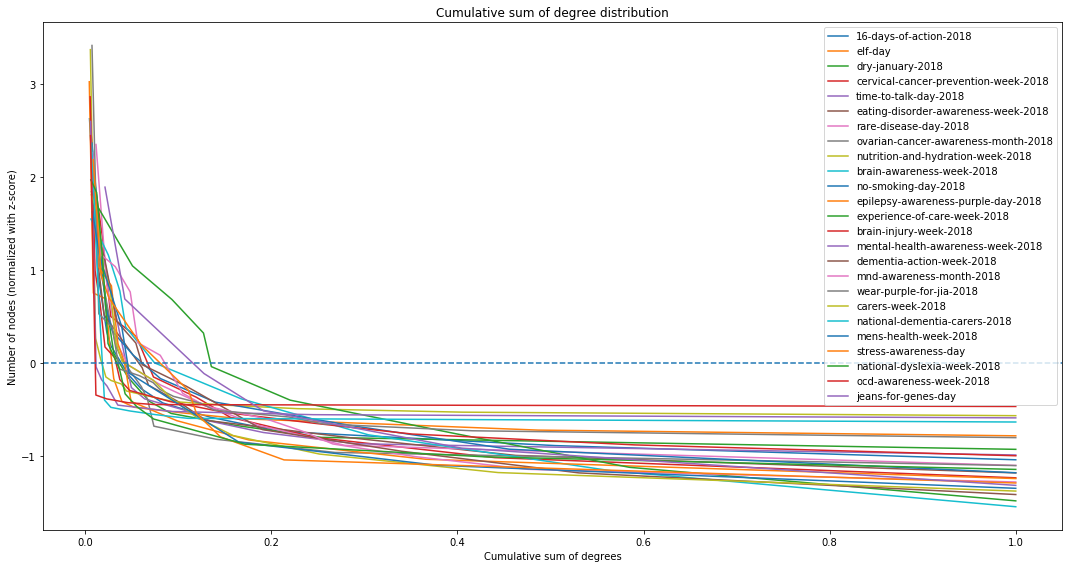

In [13]:
AnalysisHelper.plot_compare_cumsum_deg_dist(results);

Cumulative sum of degree distribution shows how the degree is distributed with respect to the number of nodes.

* Nodes with a lower degree (left on the plot) are typically way more than the ones with a high degree (right on the plot).

* Over the dotted line there's a number of node above the mean (the converse below the line) as per z-score.

* Z-score normalization for the number of nodes has been chosen because it preserves the range (maximum and minimum) and introduces the dispersion of the serie (standard deviation / variance)

\begin{align}
P(k) = \frac{\text{# nodes with degree >= k}}{\text{# nodes}}
\end{align}

Cumulative sum of degree distribution is more robust wrt the simple degree distribution because is less subject to small numbers. 

#### Summary stats for communities

In [14]:
AnalysisHelper.communities_summary_stats(results)

,values
degenerated_context_ratio,0.00
good_context_ratio,1.00
avg_communities_per_good_context,18.88
avg_sociable_users_ratio,0.59


Measures to detect the goodness of partitions from :
* *Degenerated context ratio*:
\begin{align}
\text{degenerated_context_ratio} = \frac{\text{# degenerated contexts}}{\text{# contexts}}
\end{align}
* *Good context ratio*: which is the reverse of the degenerated context ratio.
\begin{align}
\text{good_context_ratio} = \frac{\text{# good contexts}}{\text{# contexts}}
\end{align}
* *Average communities per context*: the average number of communities for number of contexts. Only considers good contexts.
\begin{align}
\text{avg_communities_per_good_context	} = \frac{\sum{\text{# good communities}}}{\text{# good contexts}}
\end{align}
* *Average sociable users ratio*: the average for the context number for the ratio of the users in the communities over the users found. Only considers good contexts.
\begin{align}
\text{avg_communities_per_good_context	} =
\frac{\sum{\frac{\text{# users in communities in context}}{\text{# all users in context}}}}
{\text{# good contexts}}
\end{align}

*note*: a "degenerated context" is a context for which the community detection algorithm hasn't found any community. Degenerated context provide then a unique great community which includes all the nodes of the network graph. A "good context" is the reverse: all the contexts for which the community detection algorithm has found at least a communtiy.

## Shared users analysis

#### Shared users and community detection

In [15]:
shared_nodes = AnalysisHelper.compare_common_nodes(results)
display(shared_nodes.is_present.value_counts())
display(shared_nodes)

False    99
True     61
Name: is_present, dtype: int64

,no_participations,is_present
nhsengland,4,True
timetochange,4,False
alzheimerssoc,4,True
carersuk,4,True
dementiauk,4,True
jenniej95408140,3,True
s9tmt,3,True
tenofficial,3,False
purehomecare,3,True
mentalhealth,3,True


Community detection process filters out users not belonging to any community.

In this table are listed all the users from all the contexts that belongs to more than one context. 

* *is_present* column: describes whether a user has survived the community detection process.
* *no_participations* column: counts how many contexts a user has been in.

**important**: no_participations below may differ for the fact that a user may have survived in a context but not other ones.

#### Shared users

In [16]:
shared_nodes = AnalysisHelper.get_common_nodes(results)
print(f'There are {len(shared_nodes.index)} shared nodes.')
display(shared_nodes.groupby('no_participations').count().name.to_frame().rename(columns={'name': 'count'}))
display(shared_nodes.sort_values(by=['no_participations', 'follower_rank'], ascending=False).round(decimals=2))

There are 61 shared nodes.


,count
no_participations,
2,55
3,2
4,2


,name,url,location,bio,follower_rank,no_participations
alzheimerssoc,Alzheimer's Society,http://www.alzheimers.org.uk/,"England, Wales & N.Ireland","We provide information and support, fund resea...",0.99,4
dementiauk,Dementia UK,http://www.dementiauk.org,"Aldgate, London",Dementia UK provides specialist dementia suppo...,0.98,4
mentalhealth,Mental Health Fdn,http://www.mentalhealth.org.uk,UK,"The UK's charity for everyone's mental health,...",0.97,3
colesmillerllp,Coles Miller LLP,http://www.coles-miller.co.uk,Dorset,Dorset Solicitors in,0.65,3
potus,President Trump,http://WhiteHouse.gov,"Washington, D.C.","45th President of the United States of America,",1.00,2
jamieoliver,Jamie Oliver,http://www.jamieoliver.com,London & Essex,The latest from my HQ and me. Order your copy ...,1.00,2
allontheboard,All on the board,https://www.facebook.com/AllontheBoard/,"London, England",Just a board with things to say. Content is ou...,1.00,2
ladygaga,Lady Gaga,http://ladygaga.com,None,None,1.00,2
jeremy_hunt,Jeremy Hunt,http://www.jeremyhunt.org,None,Foreign Secretary & South West Surrey MP,1.00,2
nhsengland,NHS England,http://www.england.nhs.uk,None,"Health and high quality care for all, now and ...",0.99,2


Number of appearances of nodes across different events togheter with Tw infos.

#### Shared users and events

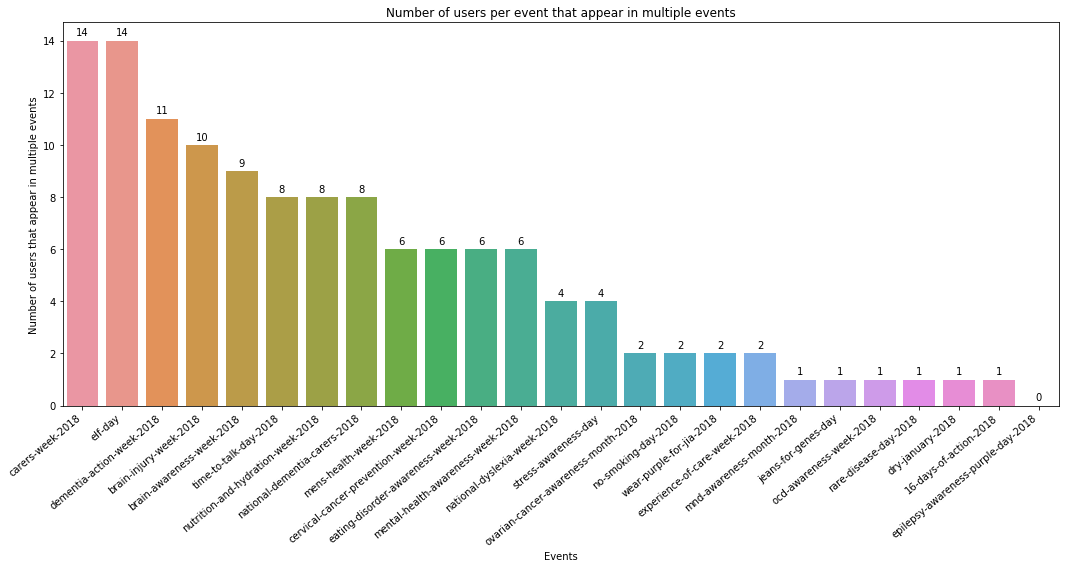

In [17]:
AnalysisHelper.plot_events_with_common_nodes(results, 'community_detection', 'nodes');

Number of users per event that appear in more than one event.

## Ranking

In [18]:
AnalysisHelper.rank_1().head(10)

,user_name,name,location,rank
0,ficajones,Fiona Jones,None,68.000
1,helenvweaver,Helen Weaver,None,68.000
2,spriggsnutri,Spriggs Nutrition,"Newbury, England",67.750
3,critcarelthtr,Critical Care LTHTR,"Preston, England",67.375
4,danielleroisin_,Danielle Beamish,None,66.667
5,mynameisandyj,Andy Jones,Co lead for @NHWeek,66.550
6,fionaliu92,Fiona Liu RD,Dublin,66.500
7,ldpartnership,LDP Diabetes,"Liverpool, UK",66.500
8,milaestevam1,Milena Estevam,London,66.500
9,slhyork,St Leonard's Hospice,York,66.348


Ranking function that takes into account:
* *Inverse in-degree*: In the considered graphs the hubs in the communities seems to be mostly related to associations and organizations. The smaller ones are more likely to be individuals.
* *Topical focus*: related to the interest the users have on the topic.

Formula:
\begin{align}
\mathit{R1}(u) & = \frac{1}{\sum_{u \in C} \mathit{IC}(u) + 1} \cdot \sum_{u \in C} \mathit{TF}(u)
\end{align}

In [19]:
AnalysisHelper.rank_2().head(10)

,rank
user_name,
johnneustadt,0.851129
jo_millar27,0.760188
hatchbrenner,0.695068
nchawkes,0.685564
moz0373runner,0.660212
aimsonhealth,0.655262
wordsharkv5,0.654294
fullcircle_play,0.643629
qsprivatehealth,0.634249


Formula:

\begin{align}
\mathit{R2}(u) & = \lvert \mathit{FR}(u) - 1 \rvert \cdot \left(\sum_{u \in C} \mathit{TA}(U) + \sum_{u \in C} \mathit{IC}(U)\right)
\end{align}

In [20]:
AnalysisHelper.rank_3().head(10)

,rank
user_name,
johnneustadt,1.495386
solutions777,1.086387
kingste29344921,0.989474
daisylu1964,0.977218
zakariamarsli,0.964789
meowaaaaaa,0.961977
vecta67,0.961748
cosfordfamily1,0.960199
hayleycorriganx,0.958333


Formula:

\begin{align}
\mathit{R3}(u) & = \lvert \mathit{FR}(u) - 1 \rvert \cdot \left(\sum_{u \in C} \mathit{TA}(U) + \frac{1}{\sum_{u \in C} \mathit{IC}(U) + 1}\right)
\end{align}

# Tables for the paper

## Table 1

In [20]:
table_1 = AnalysisHelper.get_single_summary('event_detection', 'event', results)\
        [['start_date', 'end_date', 'hashtags']].merge(graph_summaries, left_index=True, right_index=True)

table_1.reset_index(inplace=True)

table_1['hashtags'] = table_1['hashtags'].apply(lambda x: x[0].lower() if len(x)>1 else x[0].lower() + ', ...')
table_1['name'] = table_1['name'].apply(lambda x: x.replace('-2018', '').replace('-', ' ').capitalize())
table_1['period (2018)'] = table_1[['start_date', 'end_date']].apply(lambda x: ' / '.join(x).replace('2018-', ''), axis=1)


table_1[['assortativity', 'avg_degree']] = table_1[['assortativity', 'avg_degree']].round(decimals=1)
table_1['density'] = table_1['density'].round(decimals=3)

table_1 = table_1[['name', 'period (2018)', 'no_nodes', 'no_edges', 'density', 'avg_degree', 'assortativity']]

table_1.rename(columns={'name': 'context name',
                        'avg_degree': 'avg degree',
                        'no_nodes': 'nodes',
                        'no_edges': 'edges'} , inplace=True)
table_1.columns = [c.capitalize() for c in table_1.columns]

table_1.to_csv('tables/table_1.csv', index=False)
display(table_1)

,Context name,Period (2018),Nodes,Edges,Density,Avg degree,Assortativity
0,16 days of action,11-25 / 12-10,396,349,0.002,1.8,-0.1
1,Elf day,12-03 / 12-12,365,436,0.003,2.4,-0.2
2,Dry january,01-01 / 01-31,235,234,0.004,2.0,-0.3
3,Cervical cancer prevention week,01-21 / 01-27,209,192,0.004,1.8,-0.1
4,Time to talk day,02-06 / 02-07,268,231,0.003,1.7,-0.2
5,Eating disorder awareness week,02-25 / 03-03,256,241,0.004,1.9,-0.2
6,Rare disease day,02-28 / 03-01,294,206,0.002,1.4,-0.2
7,Ovarian cancer awareness month,03-01 / 03-31,215,202,0.004,1.9,-0.4
8,Nutrition and hydration week,03-11 / 03-17,273,326,0.004,2.4,-0.3
9,Brain awareness week,03-11 / 03-17,307,281,0.003,1.8,-0.1


## Table 3

In [21]:
table_3 = AnalysisHelper.get_common_nodes(results).reset_index()
table_3 = table_3.head(11).round(decimals=2).sort_values(by=['no_participations', 'follower_rank'], ascending=False)
table_3.rename(columns={'index': 'username'}, inplace=True)
table_3.drop(columns=['url', 'bio', 'location'], inplace=True)
table_3.rename(columns={'follower_rank': 'follower rank',
                        'no_participations': 'participations'} , inplace=True)
table_3.columns = [c.capitalize() for c in table_3.columns]

# hack
table_3.drop(table_3.index[10], inplace=True)

table_3.to_csv('tables/table_3.csv', index=False)
display(table_3)

,Username,Name,Follower rank,Participations
0,alzheimerssoc,Alzheimer's Society,0.99,4
1,dementiauk,Dementia UK,0.98,4
2,mentalhealth,Mental Health Fdn,0.97,3
3,colesmillerllp,Coles Miller LLP,0.65,3
6,jeremy_hunt,Jeremy Hunt,1.00,2
7,nhsengland,NHS England,0.99,2
8,carersuk,Carers UK,0.95,2
4,rdash_nhs,RDaSH NHS FT,0.88,2
5,alzsocseengland,Alzheimer's Society - South East England,0.64,2
10,mndassoc,MND Association,0.64,2


## Table 4

In [41]:
rank_1 = AnalysisHelper.rank_1().head(100).drop(columns=['name', 'location', 'rank']).rename(columns={'user_name': 'Rank 1'})
rank_2 = AnalysisHelper.rank_2().head(100).reset_index().drop(columns='rank').rename(columns={'user_name': 'Rank 2'})
rank_3 = AnalysisHelper.rank_3().head(100).reset_index().drop(columns='rank').rename(columns={'user_name': 'Rank 3'})

table_6 = rank_1.merge(rank_2, left_index=True, right_index=True)
table_6 = table_6.merge(rank_3, left_index=True, right_index=True)
table_6['#'] = table_6.index + 1
table_6 = table_6[['#', 'Rank 1', 'Rank 2', 'Rank 3']]

table_6.to_csv('tables/table_6.csv', index=False)
display(table_6)

,#,Rank 1,Rank 2,Rank 3
0,1,ficajones,johnneustadt,johnneustadt
1,2,helenvweaver,jo_millar27,solutions777
2,3,spriggsnutri,hatchbrenner,kingste29344921
3,4,critcarelthtr,nchawkes,daisylu1964
4,5,danielleroisin_,moz0373runner,zakariamarsli
5,6,mynameisandyj,aimsonhealth,meowaaaaaa
6,7,fionaliu92,wordsharkv5,vecta67
7,8,ldpartnership,fullcircle_play,cosfordfamily1
8,9,milaestevam1,qsprivatehealth,hayleycorriganx
9,10,slhyork,socialissp,jhbrasfie


# Interpret rankings

__Important: Needs manual labelling!__

In [113]:
import pandas as pd
rankings = pd.read_csv('tables/table_6_labelled.csv', dtype={
    '#': 'uint16',
    
    'Individual 1': int,
    'Professional 1': int,
    'Association 1': int,
    'Intopic 1': int,
    
    'Individual 2': int,
    'Professional 2': int,
    'Association 2': int,
    'Intopic 2': int,
    
    'Individual 3': int,
    'Professional 3': int,
    'Association 3': int,
    'Intopic 3': int
})

def get_single_rank(rankings, rank_number):
    user_type_columns = [f'{t} {rank_number}'
                         for t in ['Individual', 'Professional', 'Association', 'Intopic']]
    
    return rankings[['#'] + user_type_columns]

def cum_sum_plot(rank):
    fig, ax = plt.subplots(figsize=(15, 8))
    
    bucket_size = 10
    columns = rank.columns[1:].tolist()
    rank = rank.groupby(by=lambda x: int(x/bucket_size)).agg({
        '#': lambda x: x.iloc[-1], **{c: 'sum' for c in columns}})
    
    for c in columns:
        rank[c] = rank[c].cumsum()
        ax = sns.lineplot(x="#", y=c, data=rank, label=c.split()[0])
    
    ax.set_xlabel('Users buckets')
    ax.set_ylabel('Cumulated number of users per type')
    plt.xticks([i * bucket_size for i in range(1, len(rank.index)+1)])
    plt.title('Cumulated number of users per type')
    ax.grid(True)
    plt.show()

10


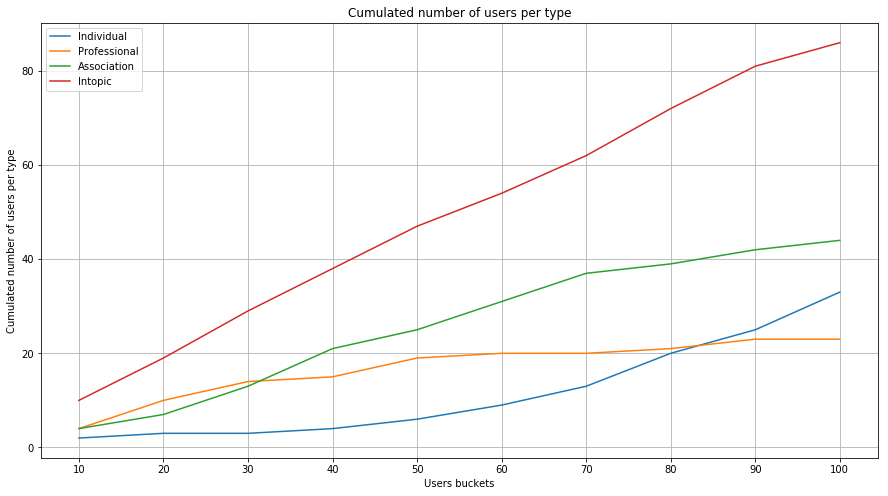

10


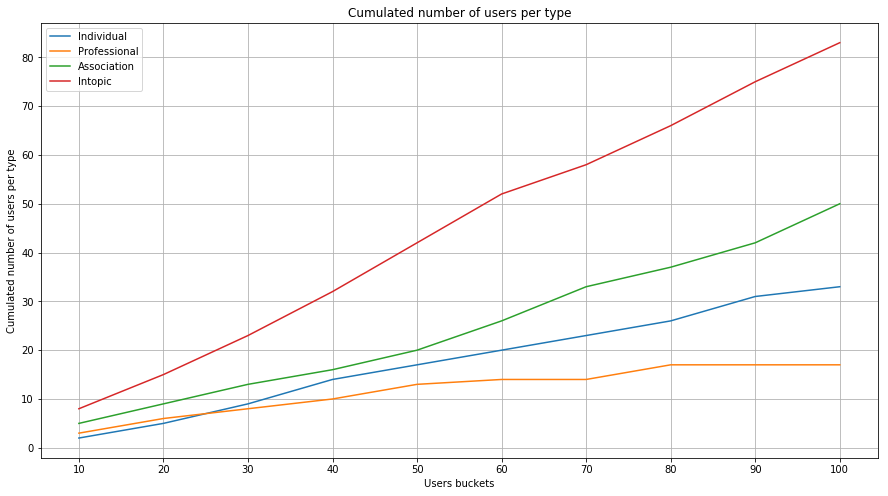

10


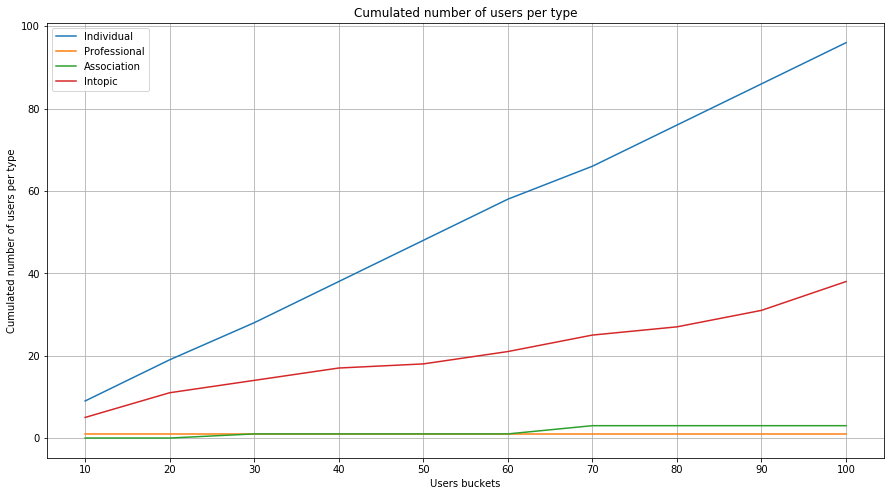

In [114]:
cum_sum_plot(get_single_rank(rankings, 1))
cum_sum_plot(get_single_rank(rankings, 2))
cum_sum_plot(get_single_rank(rankings, 3))

In [148]:
def stacked_bar_plot(rank):
    from functools import reduce
    
    fig, ax = plt.subplots(figsize=(15, 8))
    barWidth = 1
    bucket_size = 10    
    columns = rank.columns[1:-1].tolist()
    rank = rank.groupby(by=lambda x: int(x/bucket_size)).agg({
        '#': lambda x: x.iloc[-1], **{c: 'sum' for c in columns}})
    r = rank.index.tolist()
    
    for i, c in enumerate(columns):
        bottom = reduce((lambda x, y: x + y), [rank[c] for c in columns[0:i]], 0)
        plt.bar(r, rank[c], bottom=bottom, edgecolor='white', width=barWidth)
        
    plt.legend(columns)
    plt.xticks(rank.index.tolist(), [i * bucket_size for i in range(1, len(rank.index)+1)])
    plt.xlabel('Number of users')
    plt.ylabel('Number of users per type')
    plt.title('Distribution of users type over top 100 for Rank')
    plt.show()

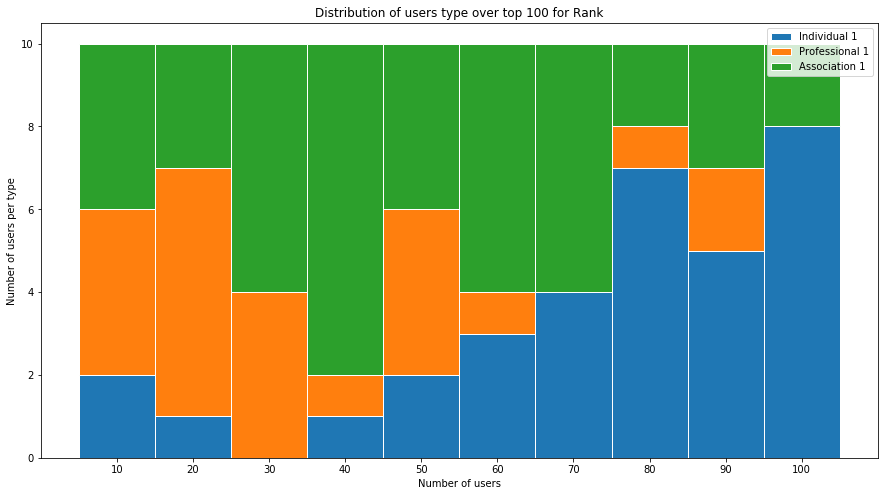

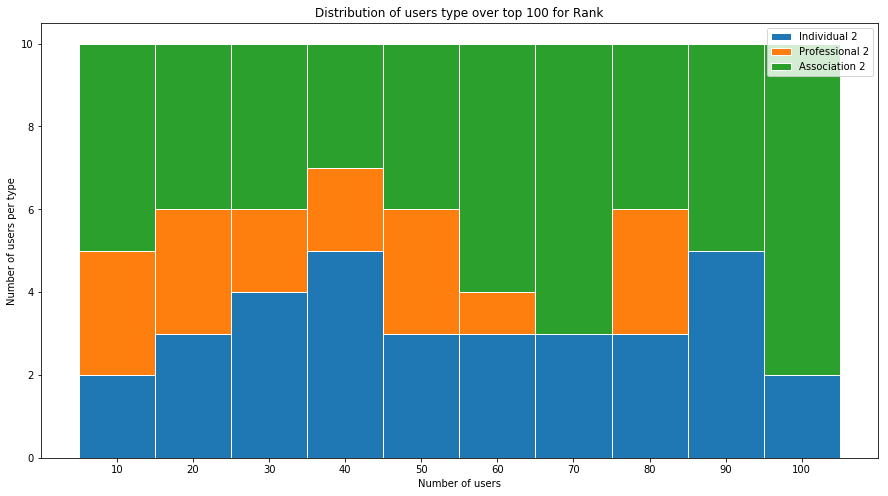

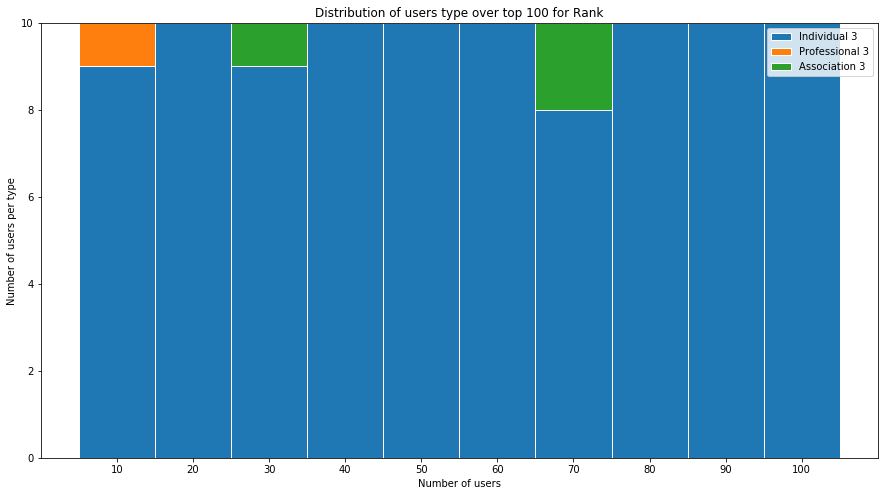

In [149]:
stacked_bar_plot(get_single_rank(rankings, 1))
stacked_bar_plot(get_single_rank(rankings, 2))
stacked_bar_plot(get_single_rank(rankings, 3))

In [77]:
plt.figure(figsize=(8,6))
barWidth = 1
r = rank_2.index.tolist()

plt.bar(r, rank_2['Individual 2'], edgecolor='white', width=barWidth)
plt.bar(r, rank_2['Professional 2'], bottom=rank_2['Individual 2'], edgecolor='white', width=barWidth)
plt.bar(r, rank_2['Association 2'], bottom=rank_2['Individual 2']+rank_2['Professional 2'], edgecolor='white', width=barWidth)

plt.legend(['Individual', 'Professional', 'Association'])
plt.xticks(rank_2.index.tolist(), [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.yticks(list(range(0,11)))
plt.xlabel('Number of users')
plt.ylabel('Number of users per type')
plt.title('Distribution of users type over top 100 for Rank 2')

plt.savefig("rank2-distribution.pdf", bbox_inches='tight')
plt.show()

NameError: name 'rank_2' is not defined

<Figure size 576x432 with 0 Axes>

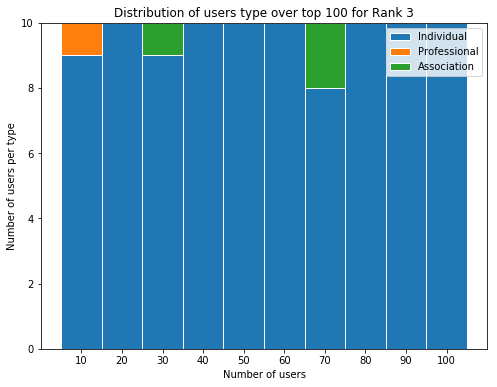

In [31]:
plt.figure(figsize=(8,6))
barWidth = 1
r = rank_3.index.tolist()

plt.bar(r, rank_3['Individual 3'], edgecolor='white', width=barWidth)
plt.bar(r, rank_3['Professional 3'], bottom=rank_3['Individual 3'], edgecolor='white', width=barWidth)
plt.bar(r, rank_3['Association 3'], bottom=rank_3['Individual 3']+rank_3['Professional 3'], edgecolor='white', width=barWidth)
# plt.plot(rank_3['Intopic 3'], color='red')

plt.legend(['Individual', 'Professional', 'Association'])
plt.xticks(rank_3.index.tolist(), [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.xlabel('Number of users')
plt.ylabel('Number of users per type')
plt.title('Distribution of users type over top 100 for Rank 3')

plt.savefig("rank3-distribution.pdf", bbox_inches='tight')
plt.show()

In [ ]:
def grouped_bar_plot(rank):
    from functools import reduce
    
    fig, ax = plt.subplots(figsize=(15, 8))
    barWidth = 0.25
    bucket_size = 10    
    columns = rank.columns[1:-1].tolist()
    rank = rank.groupby(by=lambda x: int(x/bucket_size)).agg({
        '#': lambda x: x.iloc[-1], **{c: 'sum' for c in columns}})
    r = rank.index.tolist()
    
#     for i, c in enumerate(columns):
#         bottom = reduce((lambda x, y: x + y), [rank[c] for c in columns[0:i]], 0)
#         plt.bar(r, rank[c], bottom=bottom, edgecolor='white', width=barWidth)

    for i, c in enumerate(columns):
        
        
    plt.legend(columns)
    plt.xticks(rank.index.tolist(), [i * bucket_size for i in range(1, len(rank.index)+1)])
    plt.xlabel('Number of users')
    plt.ylabel('Number of users per type')
    plt.title('Distribution of users type over top 100 for Rank')
    plt.show()

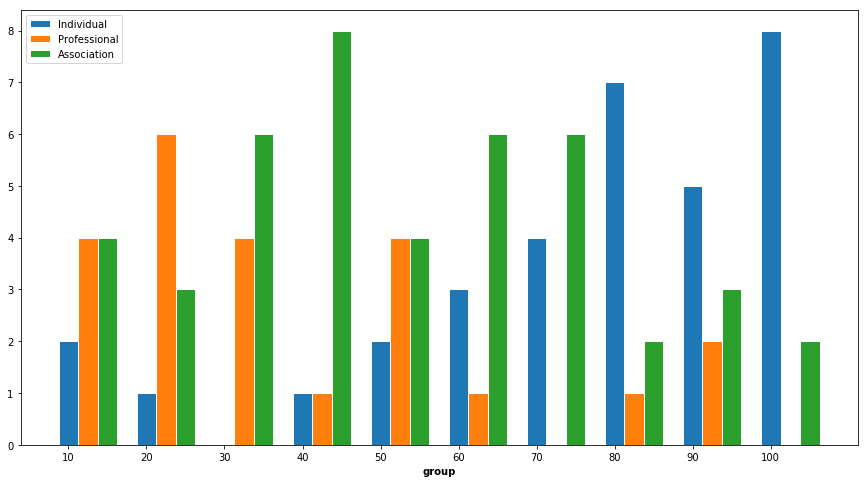

In [32]:
plt.figure(figsize=(15,8))

import numpy as np
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = rank_1['Individual 1']
bars2 = rank_1['Professional 1']
bars3 = rank_1['Association 1']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='Individual')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='Professional')
plt.bar(r3, bars3, width=barWidth, edgecolor='white', label='Association')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks(rank_1.index.tolist(), [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
 
# Create legend & Show graphic
plt.legend();

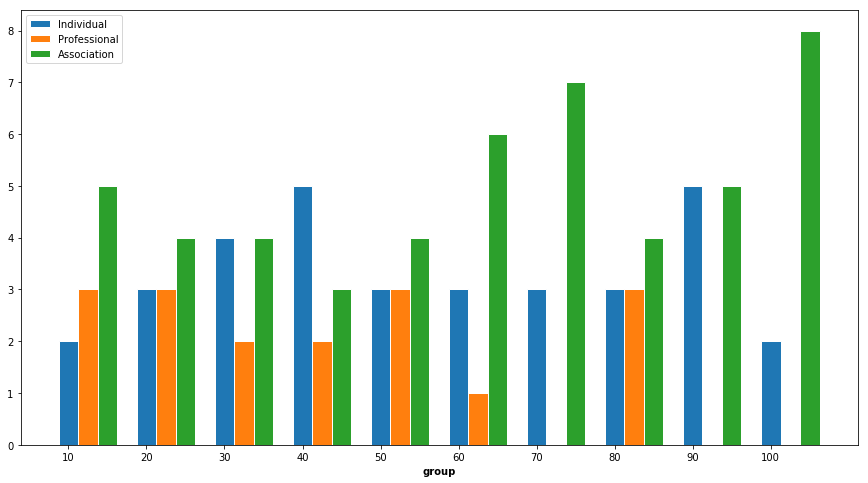

In [33]:
plt.figure(figsize=(15,8))

import numpy as np
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = rank_2['Individual 2']
bars2 = rank_2['Professional 2']
bars3 = rank_2['Association 2']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='Individual')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='Professional')
plt.bar(r3, bars3, width=barWidth, edgecolor='white', label='Association')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks(rank_1.index.tolist(), [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
 
# Create legend & Show graphic
plt.legend();